# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [ ]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from config import weather_api_key
# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)



## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

596

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [10]:
city_names = []
lat = []
lng = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []
for city in cities:
    # Save config information
    url = "http://api.openweathermap.org/data/2.5/weather?"
    # Build query URL
    query_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=imperial"
    # Get weather data
    try:
        weather_response = requests.get(query_url)
        weather_json = weather_response.json()
        city_names.append(weather_json['name'])
        lat.append(weather_json['coord']['lat'])
        lng.append(weather_json['coord']['lon'])
        max_temp.append(weather_json['main']['temp_max'])
        humidity.append(weather_json['main']['humidity'])
        cloudiness.append(weather_json['clouds']['all'])
        wind_speed.append(weather_json['wind']['speed'])
        country.append(weather_json['sys']['country'])
        date.append(weather_json['dt'])

        # Get the temperature from the response
        print(f"Processing record: {city}.")
        time.sleep(1)
    except:
        print (f"{city} not found. Skipping...")
print (f"Data retrieval finished")

Processing record: nouadhibou.
Processing record: havelock.
Processing record: severo-kurilsk.
Processing record: ushuaia.
Processing record: kapaa.
Processing record: ornskoldsvik.
Processing record: pangnirtung.
Processing record: akhtanizovskaya.
Processing record: kaka.
Processing record: bredasdorp.
Processing record: albany.
Processing record: dikson.
Processing record: mar del plata.
Processing record: lebu.
nizhneyansk not found. Skipping...
Processing record: sur.
Processing record: caidian.
tsihombe not found. Skipping...
Processing record: bria.
Processing record: grand gaube.
Processing record: krasnoselkup.
Processing record: carutapera.
Processing record: yellowknife.
Processing record: lompoc.
Processing record: narsaq.
Processing record: vaini.
Processing record: vardo.
Processing record: hermanus.
Processing record: sao joao da barra.
Processing record: petropavlovsk-kamchatskiy.
Processing record: nikolskoye.
Processing record: geraldton.
Processing record: saint geor

Processing record: alice springs.
Processing record: pangkalanbuun.
Processing record: kaitangata.
Processing record: saldanha.
Processing record: mbekenyera.
Processing record: sibu.
Processing record: thunder bay.
Processing record: aklavik.
Processing record: zorritos.
Processing record: eureka.
Processing record: huarmey.
Processing record: ouro preto do oeste.
Processing record: arman.
Processing record: mackenzie.
Processing record: airai.
Processing record: leshukonskoye.
Processing record: hammerfest.
Processing record: padang.
Processing record: mishawaka.
jeluko not found. Skipping...
Processing record: mecca.
Processing record: ocos.
Processing record: san patricio.
Processing record: boa vista.
Processing record: plouzane.
Processing record: dovers.
Processing record: gravdal.
Processing record: najran.
Processing record: zhigansk.
Processing record: necochea.
Processing record: arkhangelsk.
Processing record: la cruz.
Processing record: imbituba.
Processing record: novovor

Processing record: tahoua.
Processing record: baglan.
wulanhaote not found. Skipping...
Processing record: celestun.
Processing record: bull savanna.
Processing record: xuddur.
Processing record: saint-pierre.
Processing record: ixtapa.
Processing record: gillette.
Processing record: sobolevo.
Processing record: anqing.
Processing record: douentza.
Processing record: buin.
Processing record: alta floresta.
umzimvubu not found. Skipping...
Processing record: novo aripuana.
Processing record: cherskiy.
Processing record: sete.
Processing record: tiznit.
Processing record: vestmannaeyjar.
Processing record: santa cecilia.
Processing record: kalmunai.
Processing record: kandrian.
Processing record: kozhva.
Processing record: pyay.
Processing record: alibag.
Processing record: namwala.
Processing record: samana.
temaraia not found. Skipping...
Processing record: lodja.
Processing record: zeya.
Processing record: pisco.
Processing record: laguna.
Processing record: safaga.
louisbourg not fou

In [11]:
#Create Dataframe for csv
weather_df = pd.DataFrame({"City":city_names, 
                           "Latitude": lat, 
                           "Longitude": lng, 
                           "Max Temp": max_temp,
                           "Humidity": humidity,
                           "Cloudiness": cloudiness,
                           "Wind Speed": wind_speed,
                           "Country": country,
                           "Date": date})

weather_df.to_csv("../output_data/cities.csv")
weather_df

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Nouadhibou,20.93,-17.03,69.80,73,0,11.41,MR,1604950590
1,Havelock,34.88,-76.90,77.00,73,75,10.29,US,1604950591
2,Severo-Kuril'sk,50.68,156.12,37.81,80,100,23.87,RU,1604950592
3,Ushuaia,-54.80,-68.30,51.80,37,0,16.11,AR,1604950547
4,Kapaa,22.08,-159.32,80.60,78,40,14.99,US,1604950595
...,...,...,...,...,...,...,...,...,...
542,Dhule,20.90,74.78,69.73,35,0,5.50,IN,1604951203
543,Piedras Negras,28.70,-100.52,81.00,69,40,6.93,MX,1604951204
544,Tahe,52.33,124.73,7.70,91,37,2.48,CN,1604951205
545,Rabat,33.99,-6.84,64.00,93,40,4.70,MA,1604951207


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [12]:
#Import csv and print description DF
weather_df = pd.read_csv("../output_data/cities.csv")
weather_df.describe()

,Unnamed: 0,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,547.00000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,5.470000e+02
mean,273.00000,19.622431,15.029506,58.252888,72.204753,48.901280,8.727898,1.604951e+09
std,158.04957,33.072540,90.514721,23.733060,20.310460,40.589535,6.262011,1.955600e+02
min,0.00000,-54.800000,-175.200000,-20.510000,10.000000,0.000000,0.020000,1.604950e+09
25%,136.50000,-6.220000,-64.135000,43.550000,59.500000,1.000000,4.205000,1.604951e+09
50%,273.00000,22.030000,20.430000,65.520000,77.000000,44.000000,7.380000,1.604951e+09
75%,409.50000,47.020000,92.880000,77.115000,87.000000,90.000000,11.610000,1.604951e+09
max,546.00000,78.220000,179.320000,95.000000,100.000000,100.000000,37.400000,1.604951e+09


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

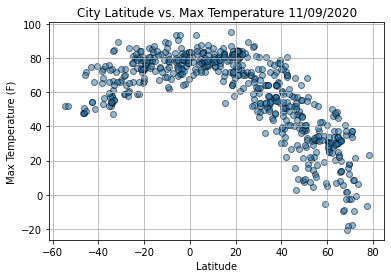

In [13]:
x_values = weather_df['Latitude']
y_values = weather_df['Max Temp']
plt.title('City Latitude vs. Max Temperature 11/09/2020')
plt.scatter(x_values,y_values, edgecolor="black", linewidths=1, marker="o", alpha=0.5)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.savefig('../output_data/Fig1.png')
plt.grid(True)
plt.show()

## Latitude vs. Humidity Plot

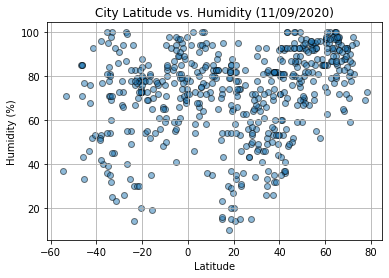

In [16]:
x_values = weather_df['Latitude']
y_values = weather_df['Humidity']
plt.title('City Latitude vs. Humidity (11/09/2020)')
plt.scatter(x_values, y_values, edgecolor="black", linewidths=1, marker="o", alpha=0.5)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.savefig('../output_data/Fig2.png')
plt.grid(True)
plt.show()

This scatter plot is showing the relationship to the distance from the equator and humidity levels. 

## Latitude vs. Cloudiness Plot

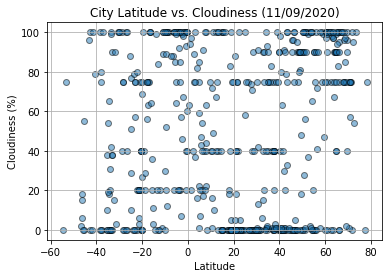

In [17]:
x_values = weather_df['Latitude']
y_values = weather_df['Cloudiness']
plt.title('City Latitude vs. Cloudiness (11/09/2020)')
plt.scatter(x_values, y_values, edgecolor="black", linewidths=1, marker="o", alpha=0.5)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.savefig('../output_data/Fig3.png')
plt.grid(True)
plt.show()

## Latitude vs. Wind Speed Plot

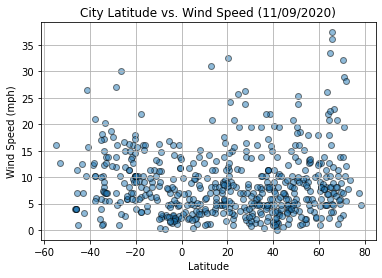

In [18]:
x_values = weather_df['Latitude']
y_values = weather_df['Wind Speed']
plt.title('City Latitude vs. Wind Speed (11/09/2020)')
plt.scatter(x_values, y_values, edgecolor="black", linewidths=1, marker="o", alpha=0.5)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.savefig('../output_data/Fig3.png')
plt.grid(True)
plt.show()

## Linear Regression

In [21]:
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel('Latitude')
    plt.ylabel(title)
    print(f"The r-value is: {rvalue**2}")
    plt.show()
    
nhemi_df = weather_df.loc[(weather_df["Latitude"] >= 0)]
shemi_df = weather_df.loc[(weather_df["Latitude"] < 0)]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.7232191654774464


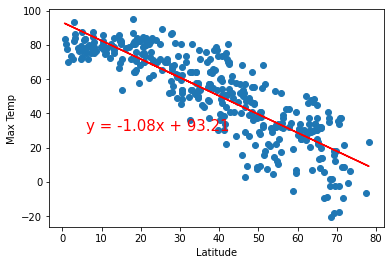

In [24]:
x_values = nhemi_df["Latitude"]
y_values = nhemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, 'Max Temp',(6,30))

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.3684898647878888


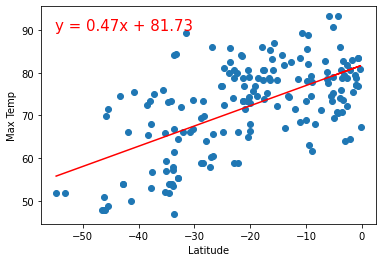

In [26]:
x_values = shemi_df["Latitude"]
y_values = shemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, 'Max Temp',(-55,90))

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.13361867246330814


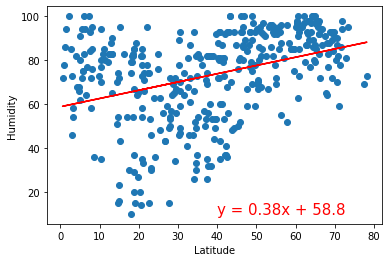

In [27]:
x_values = nhemi_df["Latitude"]
y_values = nhemi_df["Humidity"]
plot_linear_regression(x_values, y_values, 'Humidity',(40,10))

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.06236233105683244


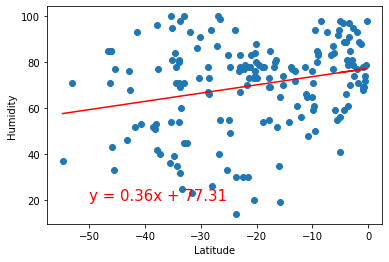

In [28]:
x_values = shemi_df["Latitude"]
y_values = shemi_df["Humidity"]
plot_linear_regression(x_values, y_values, 'Humidity',(-50,20))

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.08495742609686215


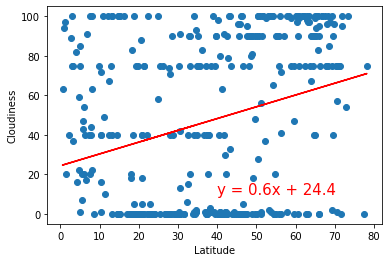

In [29]:
x_values = nhemi_df["Latitude"]
y_values = nhemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, 'Cloudiness', (40,10))

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.12363588609073485


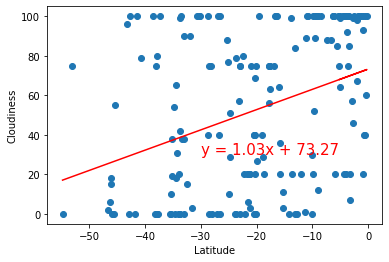

In [31]:
x_values = shemi_df["Latitude"]
y_values = shemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, 'Cloudiness', (-30,30))

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.028151166963073414


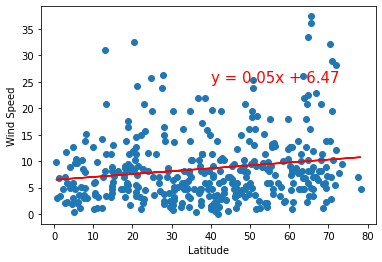

In [32]:
x_values = nhemi_df["Latitude"]
y_values = nhemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, 'Wind Speed', (40,25))

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.05810344393123529


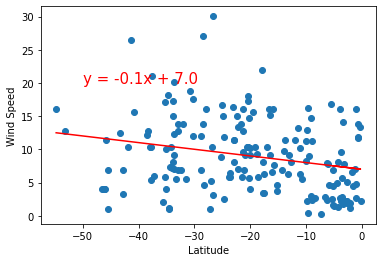

In [34]:
x_values = shemi_df["Latitude"]
y_values = shemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, 'Wind Speed', (-50, 20))